In [1]:
import pynbody
from pynbody.analysis import profile
import matplotlib.pylab as plt
import numpy as np
import astropy.units as u
from astropy.table import Table
import pandas as pd
%matplotlib inline
from analyze_sumfiles import get_sumfile
import simulation
plt.style.use('dark_background')

In [2]:
def plot_property(a, k, prop, unit=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    unit = k[prop].unit if unit is None else unit
    time = a['time'].to(u.Gyr)
    ax.plot(time, a[prop].to(unit), "r", label="MoRIA")
#     ax2 = ax.twinx()
#     ax2.s
    k2 = np.interp(a['time'], k['time'], k[prop].to(unit), left=np.nan)
    ax.plot(time[:-1], k2[:-1], label="Kicked")
    ax.set_xlabel('time (Gyr)')
    ax.set_ylabel("{0} ({1:latex})".format(prop,unit))
    ax.set_title(prop)
    plt.legend(loc=0)

In [3]:
SIM_ID="bh_5.std"

In [4]:
sim = simulation.BhSim(SIM_ID)

loading simulation: bh_5.std


In [5]:
sim[0].s

<SimSnap "/home/michele/sim/MySimulations/bh/bh_5.std/out/snapshot_0000::star" len=0>

In [11]:
sim.interact_profiles(default='density', nbins=80, max=20, log=True)

interactive(children=(IntSlider(value=0, continuous_update=False, description='Snap:', max=119), ToggleButtons(description='family', options=('g', 's'), value='g'), ToggleButtons(description='y', index=6, options=('E_circ', 'acce_norm', 'vel_norm', 'Q', 'X', 'beta', 'density', 'density_enc', 'dyntime', 'fesp', 'fourier', 'g_spherical', 'j_circ', 'j_phi', 'j_theta', 'jtot', 'kappa', 'magnitudes', 'mass', 'mass_enc', 'mgsp', 'omega', 'pattern_frequency', 'pot', 'p', 'rho', 'rotation_curve_spherical', 'sb', 'smooth', 'temp', 'u', 'v_circ', 'vel', 'zsph', 'vr', 'vr_disp'), value='density'), FloatRangeSlider(value=(0.0, 20.0), continuous_update=False, description='radius:', max=20.0, readout_format='.0f', step=10.0), Output()), _dom_classes=('widget-interact',))

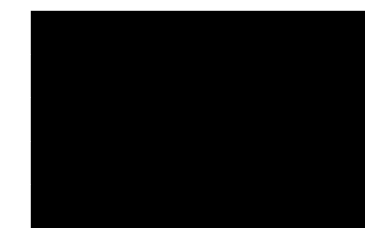

In [13]:
fig, ax = plt.subplots()

In [14]:
ax._

Bbox([[inf, inf], [-inf, -inf]])

In [7]:
sim.t_range

(0.0, 11.634935633280294)

In [10]:
sim[-1].header.redshift

0.13488453062212513

In [11]:
sim.compute_cog(verbose=False)

Computing center of gravity for all the snapshots


array([[  2.67517450e-03,   2.66632624e-03,   2.67708092e-03,
          2.69188499e-03,   2.70191813e-03,   2.71560834e-03,
          2.77849915e-03,   2.80914316e-03,   2.76652630e-03,
          2.52299779e-03,   2.09242199e-03,   1.38401159e-03,
          4.71327920e-04,  -5.70441945e-04,  -1.77224574e-03,
         -3.03413370e-03,  -4.22770623e-03,  -5.46957413e-03,
         -6.69473084e-03,  -7.96770398e-03,  -9.29557811e-03,
         -1.06310407e-02,  -1.19296415e-02,  -1.32171651e-02,
         -1.43984882e-02,  -1.55968964e-02,  -1.67601891e-02,
         -1.79125126e-02,  -1.89739019e-02,  -1.96053833e-02,
         -1.95118990e-02,  -1.84776932e-02,  -1.61222387e-02,
         -1.25094252e-02,  -7.54963374e-03,  -1.78988045e-03,
          4.44406224e-03,   1.08578596e-02,   1.74003877e-02,
          2.38799900e-02,   3.04067601e-02,   3.68502699e-02,
          4.32706550e-02,   4.95654717e-02,   5.61370589e-02,
          6.30770177e-02,   7.06210285e-02,   7.88562521e-02,
        

In [8]:
sim.interact()

VBox(children=(HBox(children=(VBox(children=(IntSlider(value=0, continuous_update=False, description='Snap:', max=119), Checkbox(value=False, description='Velocity projection'), Checkbox(value=True, description='SFH'), Checkbox(value=True, description='COG traj.'))), VBox(children=(FloatRangeSlider(value=(0.0005, 0.2), continuous_update=False, description='Rho:', max=0.2, min=0.0005, readout_format='1.0e', step=1e-05), IntSlider(value=20, continuous_update=False, description='Width (kpc):', max=1000, min=5, step=10), FloatSlider(value=1.0, continuous_update=False, description='Starsize. (kpc):', max=1000.0, min=0.1), IntSlider(value=200, continuous_update=False, description='Resol. (pix):', max=1000, min=100, step=100)))), layout=Layout(display='flex', width='150%')), Output()))